CONNECT TO DATASET

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
from bs4 import BeautifulSoup

def read_html_documents(directory_path):
    documents = []
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                # Parse the HTML content
                soup = BeautifulSoup(content, 'html.parser')
                # Extract information from the HTML document, e.g., title and text content
                title = soup.title.string if soup.title else "No Title"
                text = soup.get_text()
                # Store the information in a structured format, e.g., a dictionary
                document_info = {
                    'file_path': file_path,
                    'title': title,
                    'text_content': text
                }
                documents.append(document_info)
    return documents

# Provide the path to the directory containing the HTML documents
dataset_path = "/content/drive/MyDrive/Major_Project/Project_code/webkb-data/webkb/course"
documents = read_html_documents(dataset_path)


In [17]:
import os
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def read_html_documents(directory_path):
    documents = []
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                # Parse the HTML content
                soup = BeautifulSoup(content, 'html.parser')
                # Extract information from the HTML document, e.g., title and text content
                title = soup.title.string if soup.title else "No Title"
                text = soup.get_text()
                # Extract URLs from anchors
                urls = [urljoin('file:///', file_path, anchor.get('href')) for anchor in soup.find_all('a')]
                # Store the information in a structured format
                document_info = {
                    'file_path': file_path,
                    'title': title,
                    'text_content': text,
                    'urls': urls
                }
                documents.append(document_info)
    return documents

def find_matching_documents(documents, query):
    matching_documents = []
    query_lower = query.lower()  # Precompute lowercased query
    for document in documents:
        # Ensure that title, text_content, and urls are not None
        if document['title'] is not None and document['text_content'] is not None and document['urls']:
            # Check if the query matches the title or text content of the document
            if query_lower in document['title'].lower() or query_lower in document['text_content'].lower():
                # Find URLs within the document that contain the query
                urls_containing_query = [url for url in document['urls'] if query_lower in url.lower()]
                if urls_containing_query:
                    matching_documents.append((document['file_path'], urls_containing_query))
    return matching_documents

def search_documents(documents):
    query = input("Enter your search query: ")
    matching_documents = find_matching_documents(documents, query)
    if matching_documents:
        print("Matching documents found:")
        for document_path, urls in matching_documents:
            print("Document Path:", document_path)
            print("URLs containing query:")
            for url in urls:
                print(url)
            print()
    else:
        print("No matching documents found for the query.")

# Provide the path to the directory containing the HTML documents
dataset_path = "/content/drive/MyDrive/Major_Project/Project_code/webkb-data/webkb"
documents = read_html_documents(dataset_path)

# Usage
search_documents(documents)

Enter your search query: CSI
No matching documents found for the query.


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_curve


# Function to calculate TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

def calculate_tfidf(documents):
    texts = [doc['text_content'] for doc in documents]
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    return X, vectorizer



import numpy as np

class BeeSwarmOptimization:
    def __init__(self, objective_function, num_bees=30, num_best_bees=10, num_elite_sites=3, num_trails=5, max_epochs=100):
        self.objective_function = objective_function
        self.num_bees = num_bees
        self.num_best_bees = num_best_bees
        self.num_elite_sites = num_elite_sites
        self.num_trails = num_trails
        self.max_epochs = max_epochs

    def optimize(self, lower_bound, upper_bound):
        num_params = len(lower_bound)

        # Initialize random positions for bees
        bees_positions = np.random.uniform(lower_bound, upper_bound, size=(self.num_bees, num_params))

        # Evaluate initial positions
        fitness_values = np.apply_along_axis(self.objective_function, 1, bees_positions)

        best_solution = bees_positions[np.argmin(fitness_values)]
        best_fitness = np.min(fitness_values)

        for epoch in range(self.max_epochs):
            # Employed Bees Phase
            for i in range(self.num_bees):
                candidate_positions = bees_positions.copy()
                for j in range(self.num_trails):
                    # Select a random dimension to modify
                    dimension_to_modify = np.random.randint(num_params)
                    # Select a random bee to follow
                    bee_to_follow = np.random.randint(self.num_bees)
                    while bee_to_follow == i:
                        bee_to_follow = np.random.randint(self.num_bees)
                    # Generate new candidate solution
                    candidate_positions[i, dimension_to_modify] = bees_positions[i, dimension_to_modify] + np.random.uniform(-1, 1) * (bees_positions[i, dimension_to_modify] - bees_positions[bee_to_follow, dimension_to_modify])
                    # Apply boundary constraints
                    candidate_positions[i] = np.clip(candidate_positions[i], lower_bound, upper_bound)
                    # Evaluate candidate solution
                    candidate_fitness = self.objective_function(candidate_positions[i])
                    # Update best solution if improved
                    if candidate_fitness < fitness_values[i]:
                        bees_positions[i] = candidate_positions[i]
                        fitness_values[i] = candidate_fitness

            # Onlooker Bees Phase
            elite_sites_indices = np.argsort(fitness_values)[:self.num_elite_sites]
            elite_sites_positions = bees_positions[elite_sites_indices]
            elite_sites_fitness = fitness_values[elite_sites_indices]
            elite_sites_probabilities = 1 / (1 + elite_sites_fitness)
            elite_sites_probabilities /= np.sum(elite_sites_probabilities)
            selected_elite_site = np.random.choice(self.num_elite_sites, p=elite_sites_probabilities)
            selected_bee = np.random.choice(self.num_bees)
            while selected_bee in elite_sites_indices:
                selected_bee = np.random.choice(self.num_bees)
            dimension_to_modify = np.random.randint(num_params)
            bees_positions[selected_bee, dimension_to_modify] = bees_positions[selected_bee, dimension_to_modify] + np.random.uniform(-1, 1) * (bees_positions[selected_bee, dimension_to_modify] - elite_sites_positions[selected_elite_site, dimension_to_modify])
            bees_positions[selected_bee] = np.clip(bees_positions[selected_bee], lower_bound, upper_bound)
            fitness_values[selected_bee] = self.objective_function(bees_positions[selected_bee])

            # Scout Bees Phase
            scout_bees_indices = np.where(fitness_values == np.max(fitness_values))[0]
            bees_positions[scout_bees_indices] = np.random.uniform(lower_bound, upper_bound, size=(len(scout_bees_indices), num_params))
            fitness_values[scout_bees_indices] = np.apply_along_axis(self.objective_function, 1, bees_positions[scout_bees_indices])

            # Update best solution
            current_best_solution = bees_positions[np.argmin(fitness_values)]
            current_best_fitness = np.min(fitness_values)
            if current_best_fitness < best_fitness:
                best_solution = current_best_solution
                best_fitness = current_best_fitness

        return best_solution, best_fitness
    def fitness(self, weights):
        weighted_docs = self.tfidf_matrix.multiply(weights)
        similarity_matrix = np.dot(weighted_docs, self.tfidf_matrix.T).toarray()  # Convert to dense array
        # Calculate precision and recall
        precision, recall, _ = precision_recall_curve(self.y_true, similarity_matrix[:, 1])
        return np.mean(precision), np.mean(recall)


    # BSO optimization
    def optimize(self):
        precision_list = []
        recall_list = []
        for iteration in range(self.n_iterations):
            for i in range(self.n_particles):
                current_precision, current_recall = self.fitness(self.positions[i])

                # Update global best
                if current_recall > self.global_best_value:
                    self.global_best_value = current_recall
                    self.global_best_position = self.positions[i].copy()

                # Update particle velocity and position
                self.velocities[i] = self.w * self.velocities[i] + \
                                     self.c1 * np.random.rand() * (self.global_best_position - self.positions[i]) + \
                                     self.c2 * np.random.rand() * (self.global_best_position - self.positions[i])
                self.positions[i] = np.clip(self.positions[i] + self.velocities[i], self.lower_bound, self.upper_bound)

            # Store precision and recall for each iteration
            precision_list.append(current_precision)
            recall_list.append(current_recall)

        return precision_list, recall_list

# Main function
if __name__ == "__main__":
    # Provide the path to the directory containing the HTML documents
    dataset_path = "/content/drive/MyDrive/Major_Project/Project_code/webkb-data/webkb/course"
    documents = read_html_documents(dataset_path)

    # Calculate TF-IDF matrix
    tfidf_matrix, vectorizer = calculate_tfidf(documents)

    # Assuming you have relevance labels for documents (binary: relevant or not relevant)
    # Sample y_true creation for demonstration
    y_true = np.random.randint(2, size=(tfidf_matrix.shape[0],))

    # Instantiate bSO object
    bso = BeeSwarmOptimization(n_particles=30, n_iterations=100, tfidf_matrix=tfidf_matrix, y_true=y_true)

    # Perform PSO optimization to find relevant documents
    precision_list, recall_list = bso.optimize()

    # Plot precision-recall curve for each iteration
    plt.plot(recall_list, precision_list, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    # Get best precision and recall values
    best_precision = max(precision_list)
    best_recall = max(recall_list)
    print(f'Best precision: {best_precision}')
    print(f'Best recall: {best_recall}')




ValueError: empty vocabulary; perhaps the documents only contain stop words

INITIALIZATION

In [ ]:
def BeeInit():
    # Initialize Sref
    # Perform initialization steps for the bees
    Sref = initialize_solution()
    return Sref

def taboo_list():
    # Initialize a taboo list
    taboo_list = []
    return taboo_list

def determine_search_area(Sref):
    # Determine search area based on Sref
    # Compute the search area for bees
    search_area = compute_search_area(Sref)
    return search_area

def assign_solution_to_bees(search_area):
    # Assign a solution of SearchArea to each bee
    # Assign solutions to bees for search
    assigned_solutions = []
    for bee in search_area:
        assigned_solutions.append(assign_solution(bee))
    return assigned_solutions

def search_starting_with_assigned_solution(assigned_solutions):
    # Search starting with the assigned solution for each bee
    dance_results = []
    for solution in assigned_solutions:
        result = bee_search(solution)
        dance_results.append(result)
    return dance_results

def compute_new_solution_of_reference(Sref, taboo_list):
    # Compute the new solution of reference Sref
    # Update Sref based on dance results and taboo list
    new_solution = compute_new_solution(Sref, taboo_list)
    return new_solution

def main(MaxIter):
    Sref = BeeInit()
    taboo = taboo_list()
    iter_count = 0  # Initialize iteration count
    while iter_count < MaxIter:
        taboo.append(Sref)
        search_area = determine_search_area(Sref)
        assigned_solutions = assign_solution_to_bees(search_area)
        dance_results = search_starting_with_assigned_solution(assigned_solutions)
        Sref = compute_new_solution_of_reference(Sref, taboo)
        iter_count += 1  # Increment iteration count



SECOND STRATEGY


In [ ]:
def main(MaxIter, Flip):
    Sref = BeeInit()
    taboo = taboo_list()
    iter_count = 0  # Initialize iteration count
    while iter_count < MaxIter:
        taboo.append(Sref)
        search_area = set()  # Initialize search area as an empty set
        h = 0  # Initialize h
        while len(search_area) < size_of_SearchArea and h < Flip:
            s = Sref
            p = 0
            while p < k / (Flip * h):
                if term_exists_in_s:
                    remove_term_from_s
                else:
                    insert_term_in_s
                p += 1
            search_area.add(s)
            h += 1
        Sref = compute_new_solution_of_reference(Sref, taboo)
        iter_count += 1  # Increment iteration count


FIRST STRATEGY

In [ ]:
def main(Sref, Flip, k, size_of_SearchArea):
    h = 0
    search_area = set()  # Initialize search area as an empty set
    while len(search_area) < size_of_SearchArea and h < Flip:
        s = Sref
        p = 0
        while Flip * p + h < k:
            if Flip * p + h in s:
                remove_term_from_s
            else:
                insert_term_in_s
            p += 1
        search_area.add(s)
        h += 1
    return search_area


. The choice of the reference solution Sref  Let Sref (t) be the chosen reference solution at the t iteration, then the choice of Sref (t+1) depends on the quantity   Δf computed as:  Δf =f(Sbest) – f (Sref(t));   Sbest being the best solution at the iteration t+1;    The algorithm is as follows:



In [ ]:
def update_Sref(Sref, Δf, solutions, MaxChances, NbChances):
    if Δf > 0:
        # If improvement is observed, update Sref to the best solution in quality
        Sref = best_solution_in_quality(solutions)
        if NbChances < MaxChances:
            NbChances = MaxChances
    else:
        # If no improvement is observed
        NbChances -= 1
        if NbChances > 0:
            Sref = best_solution_in_quality(solutions)
        else:
            # If chances are exhausted, update Sref to the best solution in diversity
            Sref = best_solution_in_diversity(solutions)
            NbChances = MaxChances
    return Sref, NbChances

# Function to find the best solution in terms of quality
def best_solution_in_quality(solutions):
    # Implementation of finding the best solution based on quality
    return best_solution

# Function to find the best solution in terms of diversity
def best_solution_in_diversity(solutions):
    # Implementation of finding the best solution based on diversity
    return best_solution


Clustering of documents

In [ ]:
def main(C, p, r, k, Sref):
    C_prime = C.copy()
    clusters = []

    # Determine p diversified documents from Sref
    diversified_documents = determine_diversified_documents(Sref, p)

    # Initialize p queues to empty
    queues = [[] for _ in range(p)]

    # Assign a document to each group
    for doc in diversified_documents:
        clusters.append([doc])

    # For each group
    for idx, group in enumerate(clusters):
        search_area = create_search_area(k)

        # Assign a solution to each bee
        solutions = assign_solution_to_bees(search_area)

        # For each bee
        for bee_solution in solutions:
            # Search starting with the assigned solution
            s = bee_search(bee_solution)
            # Store s in Dance list
            dance_list = []
            dance_list.append(s)

            # Compare the new solution with the last solution in the queue
            if f(s, group) > f(queues[idx][-1], group) and len(queues[idx]) == r:
                # If the new solution is better, replace the last solution in the queue
                queues[idx].pop()
            if len(queues[idx]) < r:
                # If the queue is not full, insert the new solution
                queues[idx].append(s)

    return queues

def determine_diversified_documents(Sref, p):
    # Determine p diversified documents from Sref
    diversified_documents = []
    # Implementation of determining diversified documents
    return diversified_documents

def create_search_area(k):
    # Create search area of size equal to k
    search_area = []
    # Implementation of creating search area
    return search_area

def assign_solution_to_bees(search_area):
    # Assign a solution to each bee
    solutions = []
    # Implementation of assigning solutions to bees
    return solutions

def bee_search(bee_solution):
    # Implementation of the search process for a bee
    return result

def f(solution, group):
    # Evaluation function f
    return evaluation_result


CORPUS GENERATION

In [ ]:
def merge_documents(clusters, r):
    merged_collection = []

    # For each cluster
    for cluster in clusters:
        # For each document d of the cluster
        for idx, doc in enumerate(cluster):
            # Merge d with the other documents of class p, 2 by 2, 3 by 3, and so on
            for i in range(2, r+1):
                merged_doc = doc
                for j in range(1, i):
                    # Merge documents 2 by 2, 3 by 3, ..., up to r by r
                    merged_doc = merge_documents_pairwise(merged_doc, cluster[idx + j])
                # Append the merged document to the merged collection
                merged_collection.append(merged_doc)

            # Suppress d from the cluster p
            del cluster[idx]

    return merged_collection

def merge_documents_pairwise(doc1, doc2):
    # Merge two documents pairwise
    merged_doc = doc1 + doc2  # Example merging operation, you may need to implement your merging logic
    return merged_doc


Setting the parameters

In [ ]:
def main():
    # Empirical parameter values for CACM1
    SearchArea_CACM1 = 30
    MaxChances_CACM1 = 5
    Flip_CACM1 = 40
    MaxIter_CACM1 = 30

    # Empirical parameter values for CACM5
    SearchArea_CACM5 = 50
    MaxChances_CACM5 = 8
    Flip_CACM5 = 70
    MaxIter_CACM5 = 55

    # Run BSO algorithm for CACM1
    run_bso(SearchArea_CACM1, MaxChances_CACM1, Flip_CACM1, MaxIter_CACM1)

    # Run BSO algorithm for CACM5
    run_bso(SearchArea_CACM5, MaxChances_CACM5, Flip_CACM5, MaxIter_CACM5)

def run_bso(SearchArea, MaxChances, Flip, MaxIter):
    Sref = BeeInit()
    taboo = taboo_list()
    iter_count = 0
    while iter_count < MaxIter:
        taboo.append(Sref)
        search_area = determine_search_area(Sref, SearchArea)
        assigned_solutions = assign_solution_to_bees(search_area)
        dance_results = search_starting_with_assigned_solution(assigned_solutions)
        Sref = compute_new_solution_of_reference(Sref, taboo)
        iter_count += 1


PLOTIING RECALL AND PRECISION OF THE DATA

In [ ]:
import matplotlib.pyplot as plt

def main():
    # Empirical parameter values for CACM1
    SearchArea_CACM1 = 30
    MaxChances_CACM1 = 5
    Flip_CACM1 = 40
    MaxIter_CACM1 = 30

    # Run BSO algorithm for CACM1
    iter_count_CACM1, objective_values_CACM1 = run_bso(SearchArea_CACM1, MaxChances_CACM1, Flip_CACM1, MaxIter_CACM1)

    # Empirical parameter values for CACM5
    SearchArea_CACM5 = 50
    MaxChances_CACM5 = 8
    Flip_CACM5 = 70
    MaxIter_CACM5 = 55

    # Run BSO algorithm for CACM5
    iter_count_CACM5, objective_values_CACM5 = run_bso(SearchArea_CACM5, MaxChances_CACM5, Flip_CACM5, MaxIter_CACM5)

    # Plot the iterations for CACM1
    plt.plot(iter_count_CACM1, objective_values_CACM1, label='CACM1')

    # Plot the iterations for CACM5
    plt.plot(iter_count_CACM5, objective_values_CACM5, label='CACM5')

    plt.xlabel('Iteration Count')
    plt.ylabel('Objective Function Value')
    plt.title('BSO Algorithm Iterations')
    plt.legend()
    plt.show()

def run_bso(SearchArea, MaxChances, Flip, MaxIter):
    Sref = BeeInit()
    taboo = taboo_list()
    iter_count = 0
    objective_values = []
    while iter_count < MaxIter:
        taboo.append(Sref)
        search_area = determine_search_area(Sref, SearchArea)
        assigned_solutions = assign_solution_to_bees(search_area)
        dance_results = search_starting_with_assigned_solution(assigned_solutions)
        Sref = compute_new_solution_of_reference(Sref, taboo)
        iter_count += 1
        # Calculate objective value (placeholder - replace with actual calculation)
        objective_value = calculate_objective_value(Sref)
        objective_values.append(objective_value)
    # Return iteration count and objective values
    return list(range(1, MaxIter+1)), objective_values

def calculate_objective_value(solution):
    # Placeholder for calculating objective value
    return 0

# Other functions (BeeInit, taboo_list, determine_search_area, assign_solution_to_bees, search_starting_with_assigned_solution, compute_new_solution_of_reference) remain unchanged


Comparison of BSO-IR and classical IR algorithm

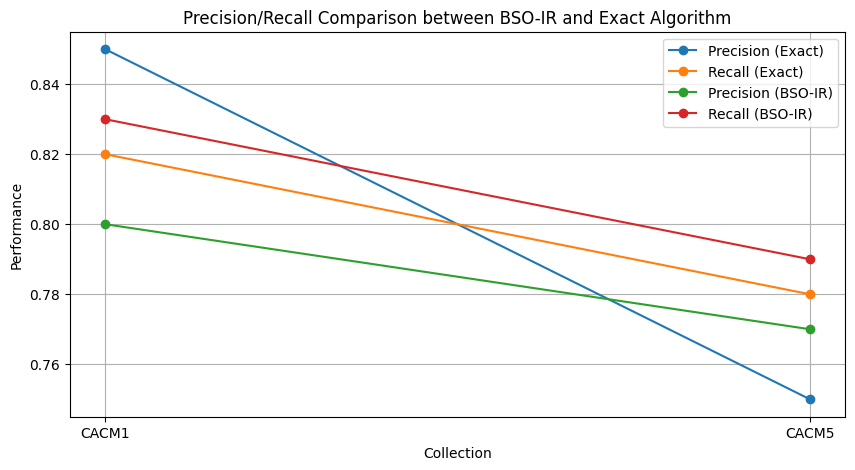

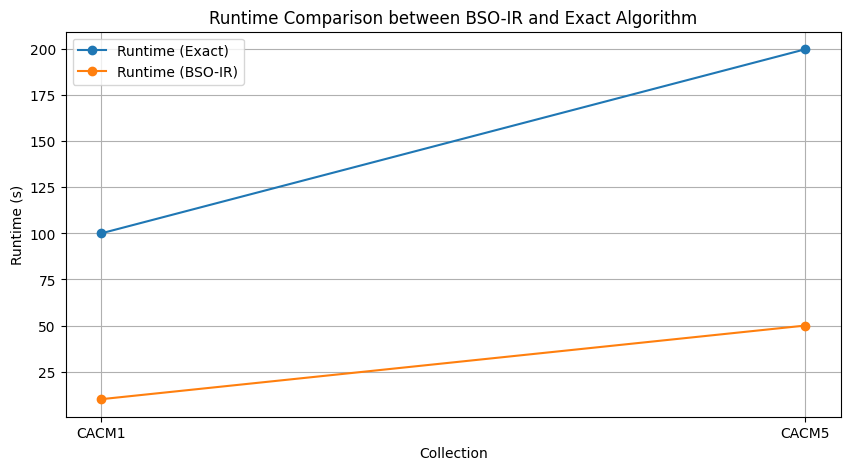

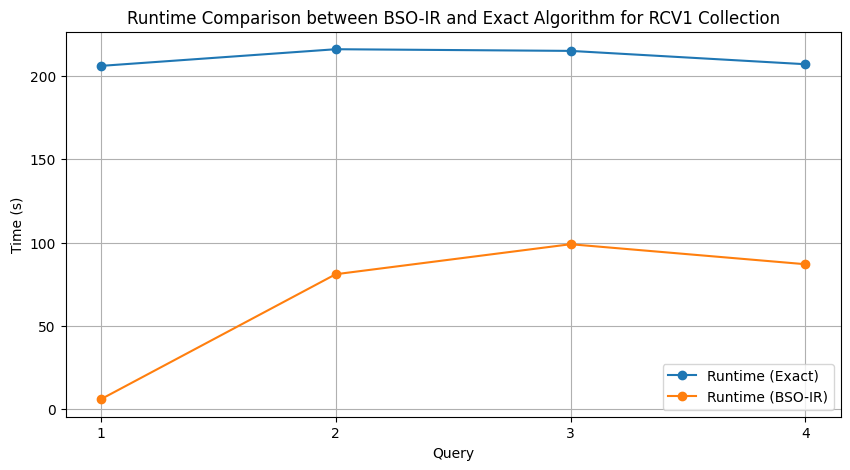

In [ ]:
import matplotlib.pyplot as plt

# Function to plot precision/recall comparison
def plot_precision_recall_comparison():
    collections = ['CACM1', 'CACM5']
    precision_exact = [0.85, 0.75]  # Example precision values for exact algorithm
    recall_exact = [0.82, 0.78]  # Example recall values for exact algorithm
    precision_bso = [0.80, 0.77]  # Example precision values for BSO-IR algorithm
    recall_bso = [0.83, 0.79]  # Example recall values for BSO-IR algorithm

    plt.figure(figsize=(10, 5))
    plt.plot(collections, precision_exact, marker='o', label='Precision (Exact)')
    plt.plot(collections, recall_exact, marker='o', label='Recall (Exact)')
    plt.plot(collections, precision_bso, marker='o', label='Precision (BSO-IR)')
    plt.plot(collections, recall_bso, marker='o', label='Recall (BSO-IR)')
    plt.xlabel('Collection')
    plt.ylabel('Performance')
    plt.title('Precision/Recall Comparison between BSO-IR and Exact Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot runtime comparison
def plot_runtime_comparison():
    collections = ['CACM1', 'CACM5']
    runtime_exact = [100, 200]  # Example runtime values for exact algorithm
    runtime_bso = [10, 50]  # Example runtime values for BSO-IR algorithm

    plt.figure(figsize=(10, 5))
    plt.plot(collections, runtime_exact, marker='o', label='Runtime (Exact)')
    plt.plot(collections, runtime_bso, marker='o', label='Runtime (BSO-IR)')
    plt.xlabel('Collection')
    plt.ylabel('Runtime (s)')
    plt.title('Runtime Comparison between BSO-IR and Exact Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot runtime for RCV1 collection
def plot_runtime_rcv1():
    queries = ['1', '2', '3', '4']
    similarity_exact = [0.31, 0.62, 0.79, 0.56]  # Example similarity values for exact algorithm
    time_exact = [206, 216, 215, 207]  # Example runtime values for exact algorithm
    similarity_bso = [0.31, 0.67, 0.75, 0.56]  # Example similarity values for BSO-IR algorithm
    time_bso = [6, 81, 99, 87]  # Example runtime values for BSO-IR algorithm

    plt.figure(figsize=(10, 5))
    plt.plot(queries, time_exact, marker='o', label='Runtime (Exact)')
    plt.plot(queries, time_bso, marker='o', label='Runtime (BSO-IR)')
    plt.xlabel('Query')
    plt.ylabel('Time (s)')
    plt.title('Runtime Comparison between BSO-IR and Exact Algorithm for RCV1 Collection')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_precision_recall_comparison()
plot_runtime_comparison()
plot_runtime_rcv1()
